# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 8 апреля 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 8 апреля, -4 балла после 06:00 15 апреля, -6 баллов после 06:00 22 апреля  -8 баллов после 06:00 29 апреля.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



*** Что почитать по теории ***

Одна из лучших книг по ML $-$ "Pattern Recognition and Machine Learning" Bishop, Christopher. 

Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$ w_{new} = w_{old}  - \frac{2f(k)}{N}  \sum_{j= 1}^{N}x_{j}(\langle\,x_j,w_{old}\rangle-y_{j}) -\frac{2f(k)}{C}w_{old} $$

* Если правильный ответ был  класс "1", а значение $\langle\,x_j,w_{old}\rangle$ стремится к нулю, после шага градиентного спуска веса в среднем увеличатся.
* Если правильный ответ был  класс "0", а значение $\langle\,x_j,w_{old}\rangle$ стремится к единице, после шага градиентного спуска веса в среднем уменьшатся.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

***Ваше решение здесь***
$$ w_{new} = w_{old}  - \frac{f(k)}{N}\sum_j^N x_j \left[ \sigma(\langle x_{j}, w_{old}\rangle)  - y_j \right] - 2f(k)\frac{w_{old}}{C} $$
* Если правильный ответ был  класс "1", а значение $a(x_i)$ близко к нулю, после шага градиентного спуска веса в среднем увеличатся.
* Если правильный ответ был  класс "0", а значение $a(x_i)$ близко к  единице, после шага градиентного спуска веса в среднем уменьшатся.

Все аналогично, но градиенты разные, потому что $\langle x_i, w \rangle$ !=  $ \sigma(\langle x_i, w\rangle) $ 

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией

$$(X^TX)w-X^TY =0$$
берем вторую производную по w
$$X^TX=0$$
В векторе $X$ все значение вещественны, $\Rightarrow$ $X^TX$ положительно определенная, $\Rightarrow$ все главные миноры положительны,  $\Rightarrow$ $|X^TX|>0$,  $\Rightarrow$ достаточное условие минимума выполнено.

$ \frac{\partial L(w)}{\partial w_j} = -\frac{2}{N}\sum_i^N \left[x_{i,j}*(y_i - \langle\,x_{i,j},w_j\rangle ) \right] + \frac{1}{C}\sum_{k=1}^{D} \frac{\partial w_k^2}{\partial w_j} = 0 $

$  -\frac{1}{N}\sum_i^N \left[x_{i,j}*(y_i - \langle\,x_{i,j},w_j\rangle ) \right] + \frac{1}{C} w_j = 0 $

$(X^TX)w-X^TY+\frac{1}{C}w =0$

$w = (X^TX+\frac{1}{C}E)^{-1}X^TY $

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

**Решение**
$$ \dfrac{d E(L|x_i)}{d a(x_i)} = 0 $$
$$ \frac {dE(L | x_i)}{da(x_i)} = - \frac{p(y_i = 1 | x_i)}{a(x_i)}  + \frac{p(y_i = 0 | x_i)}{1 - a(x_i)} = 0 $$
$$  p(y_i = 1 | x_i) = a(x_i) $$

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [35]:
def fib(max_iter=5):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [36]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [37]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3


А вот так уже нельзя.

In [38]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [39]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    size=X.shape[0]
    ind=np.arange(size)
    if shuffle:
        np.random.shuffle(ind)
    for i in range(0, size, batch_size):
        indx=ind[i : min(i+batch_size, size)]
        X_batch = X[indx]
        y_batch = y[indx]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [58]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x=1/(1+np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size=batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if(self.model_type=='lin_reg'):
            s=np.dot(X_batch,self.weights)
            loss=np.sum((y_batch-s)**2)
            loss/=X_batch.shape[0]
            loss+=np.sum(self.weights**2)/self.C
        if(self.model_type=='log_reg'):
            sgm = sigmoid(np.dot(X_batch, self.weights))
            loss = -np.sum(y_batch * np.log(sgm) + (1 - y_batch) * np.log(1 - sgm))
            loss /= X_batch.shape[0]
            loss += np.sum(self.weights ** 2) / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if(self.model_type=='lin_reg'):
            s=np.dot(X_batch, self.weights)
            loss_grad = 2*np.dot(s - y_batch, X_batch) / X_batch.shape[0]
            loss_grad+=2*self.weights/self.C
        if(self.model_type=='log_reg'):
            sgm = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = np.dot(sgm - y_batch, X_batch) / X_batch.shape[0]
            loss_grad += 2 * self.weights / self.C
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        _X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавили w0 который единица 
        self.weights = np.random.uniform(0, 1, _X.shape[1]) #можно конечно и нулями сделать
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(_X,y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

                
        return self
    
    
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if(self.model_type=='lin_reg'):
            s=(self.predict_proba(X)>0).astype(int)
        if(self.model_type=='log_reg'):
            s=(self.predict_proba(X) > 0.5).astype(int)
        return s
     
        
    def predict_proba(self, X):
        _X = np.hstack((np.ones((X.shape[0], 1)), X))
        if(self.model_type=='lin_reg'):
            s=np.dot(_X, self.weights)
        if(self.model_type=='log_reg'):
            s=sigmoid(np.dot(_X, self.weights))
        return s

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [59]:
def plot_decision_boundary(clf, lbl=None):
    wts = clf.weights
    x = np.linspace(-7, 10, num=2)
    plt.plot(x, -(wts[1] * x + wts[0]) / wts[2], label='{}'.format(lbl))

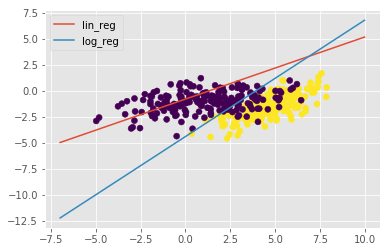

In [60]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]


# plot_decision_boundary(your_model)
myclf1 = MySGDClassifier(batch_generator, C=1000, model_type='lin_reg')
myclf1.fit(X, y)
plot_decision_boundary(myclf1,'lin_reg')
myclf2 = MySGDClassifier(batch_generator, C=1000, model_type='log_reg')
myclf2.fit(X, y)
plot_decision_boundary(myclf2,'log_reg')
plt.legend()
plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [61]:
from sklearn.datasets import make_classification

In [62]:
X, y = make_classification(n_samples=1000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
X.shape

(1000, 10)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

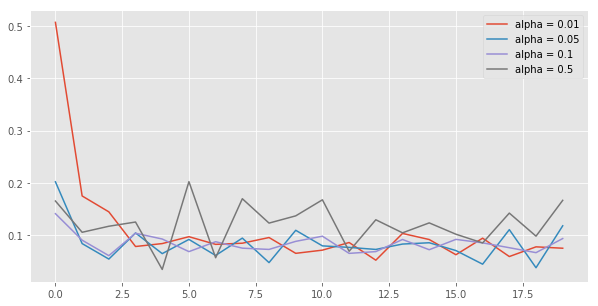

In [63]:
plt.figure(figsize=(10, 5))
N = 500
alpha = [0.01, 0.05, 0.1, 0.5]
for a in alpha:
    myclf_1 = MySGDClassifier(batch_generator, alpha=a, C=1000, model_type='log_reg')
    myclf_1.fit(X, y)
    m = []
    for i in range(len(myclf_1.errors_log['loss']) // N):
        m.append(np.sum(myclf_1.errors_log['loss'][i * N : (i + 1) * N]) / N)
    plt.plot(np.arange(len(m)), m, label='alpha = {}'.format(a))
plt.legend()
plt.show()

C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in multiply
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in subtract


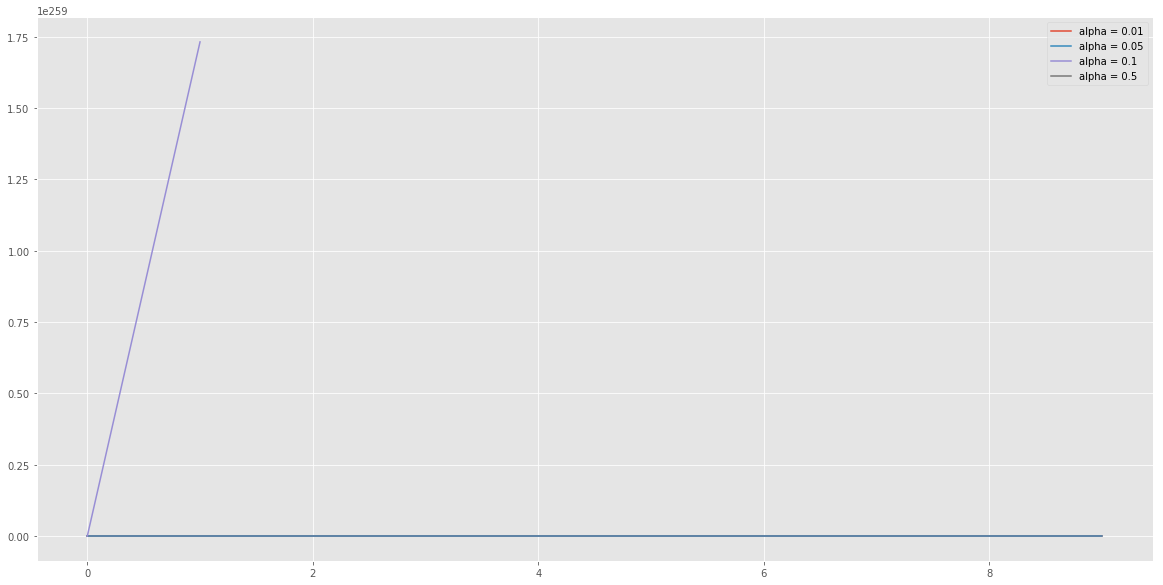

In [74]:
plt.figure(figsize=(20, 10))
N = 1000
alpha = [0.01, 0.05, 0.1, 0.5]
for a in alpha:
    myclf_2 = MySGDClassifier(batch_generator, alpha=a, C=100)
    myclf_2.fit(X, y)
    m2 = []
    for i in range(len(myclf_2.errors_log['loss']) // N):
        m2.append(np.sum(myclf_2.errors_log['loss'][i * N : (i + 1) * N]) / N)
    plt.plot(np.arange(len(m2)), m2, label='alpha = {}'.format(a))
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Для довольно больших `alpha` возможно постоянное перепрыгивание через локальный минимум. 
Более менее оптимальное `alpha` мне кажется примерно равным 0,01

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in double_scalars
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in true_divide


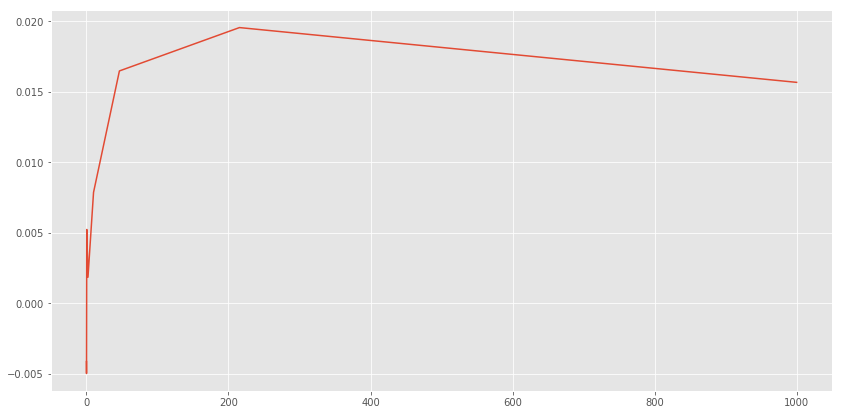

In [75]:
plt.figure(figsize=(14, 7))
ks = np.logspace(3, -3, 10)
mw = np.zeros(ks.shape)

for i, C in enumerate(ks):
    myclf = MySGDClassifier(batch_generator, C=C)
    myclf.fit(X, y)
    mw[i] = myclf.weights.mean()
    
plt.plot(ks, mw)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in double_scalars
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in square
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in true_divide


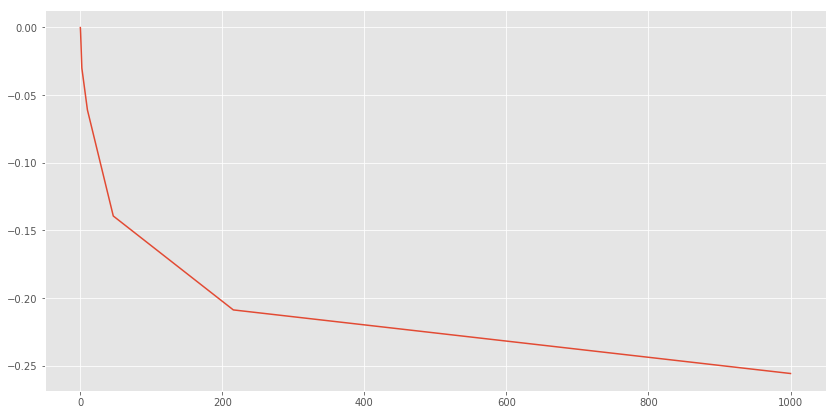

In [56]:
plt.figure(figsize=(14, 7))
ks = np.logspace(3, -3, 10)
mw = np.zeros(ks.shape)

for i, C in enumerate(ks):
    myclf = MySGDClassifier(batch_generator, C=C, model_type='log_reg')
    myclf.fit(X, y)
    mw[i] = myclf.weights.mean()
    
plt.plot(ks, mw)
plt.show()

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview-2.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [76]:
import shutil
import sys
doc_to_title = {}
with open('docs_titles.tsv',encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [77]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [78]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [79]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
scale_features_std = StandardScaler()

In [80]:
lr=LinearRegression()
scale_features_std = StandardScaler()
X_train=scale_features_std.fit_transform(X_train) 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train,train_size=0.1, stratify=y_train)
lr.fit(X_train2, y_train2)
print(roc_auc_score(y_test2, (lr.predict(X_test2)>=0.5).astype(int)))
print(lr.score(X_test2, y_test2))
print(f1_score(y_test2, (lr.predict(X_test2)>=0.5).astype(int)))

0.6631228335553067
0.20659672831724296
0.5039470876893536


C:\Users\vkrin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vkrin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vkrin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [81]:
myclf = MySGDClassifier(batch_generator,alpha=0.01, C=100, model_type='lin_reg', batch_size=100)
myclf.fit(X_train, y_train)
f1_score(y_train, myclf.predict(X_train))

0.4489522661846421

In [82]:
myclf = MySGDClassifier(batch_generator,alpha=0.01, C=1000, max_epoch=1, model_type='lin_reg', batch_size=5000)
myclf.fit(X_train, y_train)
f1_score(y_train, myclf.predict(X_train))

0.6105315449577745

In [83]:
myclf = MySGDClassifier(batch_generator, alpha=0.0001, C=100, model_type='log_reg', batch_size=200)
myclf.fit(X_train, y_train)
f1_score(y_train, myclf.predict(X_train))

C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
C:\Users\vkrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply


0.6103461109043543

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [15]:
scale_features_std = StandardScaler()
X_train=scale_features_std.fit_transform(X_train)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, stratify=y_train)
al=[0.01, 0.05]
Cs=[1, 5, 10, 50, 100, 500, 1000, 5000]
epoch=[1, 2, 5]
batchs=[1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
for a in al:
    for ci in Cs:
        for e in epoch:
            for batch in batchs:
                myclf4 = MySGDClassifier(batch_generator, alpha=a, C=ci,max_epoch=e, model_type='lin_reg', batch_size=batch)
#print(np.mean(cross_val_score(myclf4, X_train, y_train, cv=50)))
                myclf4.fit(X_train2, y_train2)
                print(f1_score(y_test2, myclf4.predict(X_test2)), a, ci, e, batch)

0.4470463012240553 0.01 1 1 1
0.5911674682990817 0.01 1 1 5
0.577126577126577 0.01 1 1 10
0.5045454545454545 0.01 1 1 50
0.5436681222707423 0.01 1 1 100
0.562992125984252 0.01 1 1 500
0.596606974552309 0.01 1 1 1000
0.6011877569666514 0.01 1 1 5000
0.606501698204755 0.01 1 1 10000
0.5053728427222404 0.01 1 2 1
0.5826377295492488 0.01 1 2 5
0.5027428202646015 0.01 1 2 10
0.5562403697996918 0.01 1 2 50
0.5063955395211545 0.01 1 2 100
0.5403348554033486 0.01 1 2 500
0.4642656162070906 0.01 1 2 1000
0.6073710073710074 0.01 1 2 5000
0.6033797216699801 0.01 1 2 10000
0.4452127659574468 0.01 1 5 1
0.5559815950920246 0.01 1 5 5
0.5726978998384491 0.01 1 5 10
0.5474695234577023 0.01 1 5 50
0.5062295081967213 0.01 1 5 100
0.5011100539169046 0.01 1 5 500
0.4443812233285918 0.01 1 5 1000
0.5964912280701754 0.01 1 5 5000
0.5969316596931659 0.01 1 5 10000
0.4851217312894499 0.01 5 1 1
0.4849759615384616 0.01 5 1 5
0.4946037619488129 0.01 5 1 10
0.4580912863070539 0.01 5 1 50
0.486252703120173 0.01 5

0.5136186770428015 0.05 5 2 1
0.4907153729071537 0.05 5 2 5
0.44657097288676234 0.05 5 2 10
0.44645229869784747 0.05 5 2 50
0.4851217312894499 0.05 5 2 100
0.4535969247666118 0.05 5 2 500
0.4489460717218724 0.05 5 2 1000
0.5211469534050179 0.05 5 2 5000
0.4974554707379135 0.05 5 2 10000
0.5219869706840391 0.05 5 5 1
0.5723524656426839 0.05 5 5 5
0.5047093212081845 0.05 5 5 10
0.44645229869784747 0.05 5 5 50
0.48410317936412717 0.05 5 5 100
0.4933703361085415 0.05 5 5 500
0.46045197740113 0.05 5 5 1000
0.44645229869784747 0.05 5 5 5000
0.44551282051282054 0.05 5 5 10000
0.31212121212121213 0.05 10 1 1
0.5053939195815627 0.05 10 1 5
0.49780839073262373 0.05 10 1 10
0.4755776542848787 0.05 10 1 50
0.4467629748528625 0.05 10 1 100
0.4483221476510067 0.05 10 1 500
0.5045811518324607 0.05 10 1 1000
0.48972077324332614 0.05 10 1 5000
0.5825491873396065 0.05 10 1 10000
0.452051073077968 0.05 10 2 1
0.5012722646310434 0.05 10 2 5
0.5030635278942277 0.05 10 2 10
0.4959349593495935 0.05 10 2 50
0

In [84]:
X_train=scale_features_std.fit_transform(X_train)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, stratify=y_train)
myclf4 = MySGDClassifier(batch_generator, alpha=1, C=500,max_epoch=1, model_type='log_reg', batch_size=5000)
myclf4.fit(X_train2, y_train2)
print(f1_score(y_test2, myclf4.predict(X_test2)))
print(accuracy_score(y_test2, myclf4.predict(X_test2)))
print(roc_auc_score(y_test2, myclf4.predict(X_test2)))

0.6044273339749759
0.7187820732124529
0.7273860960610841


In [85]:
logr=LogisticRegression()
logr.fit(X_train2, y_train2)
print(logr.score(X_test2, y_test2))
print(f1_score(y_test2, logr.predict(X_test2)))
print(roc_auc_score(y_test2, logr.predict(X_test2)))

0.786520697913103
0.5322338830584707
0.6779441853553712


C:\Users\vkrin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, pair_id))


In [20]:
X_test = []
y_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title_j, pair_id) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, pair_id = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [24]:
X_test=scale_features_std.fit_transform(X_test)
res = myclf4.predict(X_test)

In [25]:
file = open("out.csv", "wb")
file.write( bytes(str("pair_id,target\n"), "utf-8"))
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]

    for k, (doc_id, title, pair_id) in enumerate(docs):
        all_dist = []
        print(pair_id,res[pair_id-11691])
        file.write(bytes(str(pair_id) + "," +str(res[pair_id-11691]) + str("\n"), "utf-8"))
file.close()

11691 1
11692 1
11693 1
11694 1
11695 1
11696 1
11697 1
11698 1
11699 1
11700 1
11701 1
11702 1
11703 1
11704 1
11705 1
11706 1
11707 1
11708 1
11709 1
11710 1
11711 1
11712 1
11713 1
11714 1
11715 1
11716 1
11717 1
11718 1
11719 1
11720 1
11721 1
11722 1
11723 1
11724 1
11725 1
11726 1
11727 1
11728 1
11729 1
11730 1
11731 1
11732 1
11733 1
11734 1
11735 1
11736 1
11737 1
11738 1
11739 1
11740 1
11741 1
11742 1
11743 1
11744 1
11745 1
11746 1
11747 1
11748 1
11749 1
11750 1
11751 1
11752 1
11753 1
11754 1
11755 1
11756 1
11757 1
11758 1
11759 1
11760 1
11761 1
11762 1
11763 1
11764 1
11765 1
11766 1
11767 1
11768 1
11769 1
11770 1
11771 1
11772 1
11773 1
11774 1
11775 1
11776 1
11777 1
11778 1
11779 1
11780 1
11781 1
11782 1
11783 1
11784 1
11785 1
11786 1
11787 1
11788 1
11789 0
11790 0
11791 0
11792 0
11793 0
11794 0
11795 0
11796 0
11797 0
11798 0
11799 0
11800 0
11801 0
11802 0
11803 0
11804 0
11805 0
11806 0
11807 0
11808 0
11809 0
11810 0
11811 0
11812 0
11813 0
11814 0
11815 0


12861 0
12862 0
12863 0
12864 0
12865 0
12866 0
12867 0
12868 0
12869 0
12870 0
12871 0
12872 0
12873 0
12874 0
12875 0
12876 0
12877 0
12878 0
12879 0
12880 0
12881 0
12882 0
12883 0
12884 0
12885 0
12886 0
12887 0
12888 0
12889 0
12890 0
12891 0
12892 0
12893 0
12894 0
12895 0
12896 0
12897 0
12898 0
12899 0
12900 0
12901 0
12902 0
12903 0
12904 0
12905 0
12906 0
12907 0
12908 0
12909 0
12910 0
12911 0
12912 0
12913 0
12914 0
12915 0
12916 0
12917 0
12918 0
12919 0
12920 0
12921 0
12922 0
12923 0
12924 0
12925 0
12926 0
12927 0
12928 0
12929 0
12930 0
12931 0
12932 0
12933 0
12934 0
12935 0
12936 0
12937 0
12938 0
12939 0
12940 1
12941 1
12942 0
12943 1
12944 1
12945 1
12946 1
12947 1
12948 1
12949 1
12950 1
12951 1
12952 0
12953 1
12954 1
12955 1
12956 1
12957 1
12958 1
12959 1
12960 0
12961 1
12962 1
12963 1
12964 1
12965 1
12966 1
12967 1
12968 1
12969 1
12970 1
12971 1
12972 1
12973 1
12974 1
12975 1
12976 1
12977 1
12978 1
12979 0
12980 1
12981 1
12982 1
12983 1
12984 1
12985 1


15110 1
15111 1
15112 1
15113 1
15114 1
15115 1
15116 1
15117 1
15118 1
15119 1
15120 1
15121 1
15122 1
15123 1
15124 1
15125 1
15126 1
15127 1
15128 1
15129 1
15130 1
15131 1
15132 1
15133 1
15134 1
15135 1
15136 1
15137 1
15138 1
15139 1
15140 1
15141 1
15142 1
15143 1
15144 1
15145 1
15146 1
15147 1
15148 1
15149 1
15150 1
15151 1
15152 1
15153 1
15154 1
15155 1
15156 1
15157 0
15158 0
15159 0
15160 0
15161 0
15162 0
15163 0
15164 0
15165 0
15166 0
15167 0
15168 0
15169 0
15170 0
15171 0
15172 0
15173 0
15174 0
15175 0
15176 0
15177 0
15178 0
15179 0
15180 0
15181 0
15182 0
15183 0
15184 0
15185 0
15186 0
15187 0
15188 0
15189 0
15190 0
15191 0
15192 0
15193 0
15194 0
15195 0
15196 0
15197 0
15198 0
15199 0
15200 0
15201 0
15202 0
15203 0
15204 0
15205 0
15206 0
15207 0
15208 0
15209 0
15210 0
15211 0
15212 0
15213 0
15214 0
15215 0
15216 0
15217 0
15218 0
15219 0
15220 0
15221 0
15222 0
15223 0
15224 0
15225 0
15226 0
15227 0
15228 0
15229 0
15230 0
15231 0
15232 0
15233 0
15234 0


16360 1
16361 1
16362 1
16363 1
16364 1
16365 1
16366 1
16367 1
16368 1
16369 1
16370 1
16371 1
16372 1
16373 1
16374 1
16375 1
16376 1
16377 1
16378 1
16379 1
16380 1
16381 1
16382 1
16383 1
16384 1
16385 1
16386 1
16387 1
16388 1
16389 1
16390 0
16391 0
16392 0
16393 0
16394 0
16395 0
16396 0
16397 0
16398 0
16399 0
16400 0
16401 0
16402 0
16403 0
16404 0
16405 0
16406 0
16407 0
16408 0
16409 0
16410 0
16411 0
16412 0
16413 0
16414 0
16415 0
16416 0
16417 0
16418 0
16419 0
16420 0
16421 0
16422 0
16423 0
16424 0
16425 0
16426 0
16427 0
16428 0
16429 0
16430 0
16431 0
16432 0
16433 0
16434 0
16435 0
16436 0
16437 0
16438 0
16439 0
16440 0
16441 0
16442 0
16443 0
16444 0
16445 0
16446 0
16447 0
16448 0
16449 0
16450 0
16451 0
16452 0
16453 0
16454 0
16455 0
16456 0
16457 0
16458 0
16459 0
16460 0
16461 0
16462 0
16463 0
16464 0
16465 0
16466 0
16467 0
16468 0
16469 0
16470 0
16471 0
16472 0
16473 0
16474 0
16475 0
16476 0
16477 0
16478 0
16479 0
16480 0
16481 0
16482 0
16483 0
16484 0


17610 0
17611 0
17612 0
17613 0
17614 0
17615 0
17616 0
17617 0
17618 0
17619 0
17620 0
17621 0
17622 0
17623 0
17624 0
17625 0
17626 0
17627 0
17628 0
17629 0
17630 0
17631 0
17632 0
17633 0
17634 0
17635 0
17636 0
17637 0
17638 0
17639 0
17640 0
17641 0
17642 0
17643 0
17644 0
17645 0
17646 0
17647 0
17648 0
17649 0
17650 0
17651 0
17652 0
17653 0
17654 0
17655 0
17656 0
17657 0
17658 0
17659 0
17660 0
17661 0
17662 0
17663 0
17664 0
17665 0
17666 0
17667 0
17668 0
17669 0
17670 0
17671 0
17672 0
17673 0
17674 0
17675 0
17676 0
17677 0
17678 0
17679 0
17680 0
17681 0
17682 0
17683 0
17684 0
17685 0
17686 0
17687 0
17688 0
17689 0
17690 0
17691 0
17692 0
17693 0
17694 0
17695 0
17696 1
17697 1
17698 1
17699 1
17700 1
17701 1
17702 1
17703 1
17704 1
17705 1
17706 1
17707 1
17708 1
17709 1
17710 1
17711 1
17712 1
17713 1
17714 1
17715 1
17716 1
17717 1
17718 1
17719 1
17720 1
17721 1
17722 1
17723 1
17724 1
17725 1
17726 1
17727 1
17728 1
17729 1
17730 1
17731 1
17732 1
17733 1
17734 1


18860 0
18861 0
18862 0
18863 0
18864 0
18865 0
18866 0
18867 0
18868 0
18869 0
18870 0
18871 0
18872 0
18873 0
18874 0
18875 0
18876 0
18877 0
18878 0
18879 0
18880 0
18881 0
18882 0
18883 0
18884 0
18885 0
18886 0
18887 0
18888 0
18889 0
18890 0
18891 0
18892 0
18893 0
18894 0
18895 0
18896 0
18897 0
18898 0
18899 0
18900 0
18901 0
18902 0
18903 0
18904 0
18905 0
18906 0
18907 0
18908 0
18909 0
18910 0
18911 0
18912 0
18913 0
18914 0
18915 0
18916 0
18917 0
18918 0
18919 0
18920 0
18921 0
18922 0
18923 0
18924 0
18925 0
18926 0
18927 0
18928 0
18929 0
18930 0
18931 0
18932 0
18933 0
18934 0
18935 0
18936 0
18937 0
18938 0
18939 0
18940 0
18941 0
18942 0
18943 0
18944 0
18945 0
18946 0
18947 0
18948 0
18949 0
18950 0
18951 0
18952 0
18953 0
18954 0
18955 0
18956 0
18957 0
18958 0
18959 0
18960 0
18961 0
18962 0
18963 0
18964 0
18965 0
18966 0
18967 0
18968 0
18969 0
18970 0
18971 0
18972 0
18973 0
18974 0
18975 0
18976 0
18977 0
18978 0
18979 0
18980 0
18981 0
18982 0
18983 0
18984 0


20109 0
20110 0
20111 0
20112 0
20113 0
20114 0
20115 0
20116 0
20117 0
20118 0
20119 0
20120 0
20121 0
20122 0
20123 0
20124 0
20125 0
20126 0
20127 0
20128 0
20129 0
20130 0
20131 0
20132 0
20133 0
20134 0
20135 0
20136 0
20137 0
20138 0
20139 0
20140 0
20141 0
20142 0
20143 0
20144 0
20145 0
20146 0
20147 0
20148 0
20149 0
20150 0
20151 0
20152 0
20153 0
20154 0
20155 0
20156 0
20157 0
20158 0
20159 0
20160 0
20161 0
20162 0
20163 0
20164 0
20165 0
20166 0
20167 0
20168 0
20169 0
20170 0
20171 0
20172 0
20173 0
20174 0
20175 0
20176 0
20177 0
20178 0
20179 0
20180 0
20181 0
20182 0
20183 0
20184 0
20185 0
20186 0
20187 0
20188 0
20189 0
20190 0
20191 0
20192 0
20193 0
20194 0
20195 0
20196 0
20197 0
20198 0
20199 0
20200 0
20201 0
20202 0
20203 0
20204 0
20205 0
20206 0
20207 0
20208 0
20209 0
20210 0
20211 0
20212 0
20213 0
20214 0
20215 0
20216 0
20217 0
20218 0
20219 0
20220 0
20221 0
20222 0
20223 0
20224 0
20225 0
20226 0
20227 0
20228 0
20229 0
20230 0
20231 0
20232 0
20233 0


21359 1
21360 1
21361 1
21362 1
21363 1
21364 1
21365 1
21366 1
21367 1
21368 1
21369 1
21370 1
21371 0
21372 1
21373 1
21374 1
21375 1
21376 1
21377 1
21378 1
21379 1
21380 1
21381 1
21382 1
21383 1
21384 1
21385 1
21386 1
21387 1
21388 1
21389 1
21390 1
21391 1
21392 1
21393 1
21394 1
21395 0
21396 0
21397 0
21398 0
21399 0
21400 0
21401 0
21402 0
21403 0
21404 0
21405 0
21406 0
21407 0
21408 0
21409 0
21410 0
21411 0
21412 0
21413 0
21414 0
21415 0
21416 0
21417 0
21418 0
21419 0
21420 0
21421 0
21422 0
21423 0
21424 0
21425 0
21426 0
21427 0
21428 0
21429 0
21430 0
21431 0
21432 0
21433 0
21434 0
21435 0
21436 0
21437 0
21438 0
21439 0
21440 0
21441 0
21442 0
21443 0
21444 0
21445 0
21446 0
21447 0
21448 0
21449 0
21450 0
21451 0
21452 0
21453 0
21454 0
21455 0
21456 0
21457 0
21458 0
21459 0
21460 0
21461 0
21462 0
21463 0
21464 0
21465 0
21466 0
21467 0
21468 0
21469 0
21470 0
21471 0
21472 0
21473 0
21474 0
21475 0
21476 0
21477 0
21478 0
21479 0
21480 0
21481 0
21482 0
21483 0


22609 0
22610 0
22611 0
22612 0
22613 0
22614 0
22615 0
22616 0
22617 0
22618 0
22619 0
22620 0
22621 0
22622 0
22623 0
22624 0
22625 0
22626 0
22627 0
22628 0
22629 0
22630 0
22631 0
22632 0
22633 0
22634 0
22635 0
22636 0
22637 0
22638 0
22639 0
22640 0
22641 0
22642 0
22643 1
22644 1
22645 1
22646 1
22647 1
22648 1
22649 1
22650 1
22651 1
22652 1
22653 1
22654 1
22655 1
22656 1
22657 1
22658 1
22659 1
22660 1
22661 1
22662 1
22663 1
22664 1
22665 1
22666 1
22667 1
22668 1
22669 1
22670 1
22671 1
22672 1
22673 1
22674 1
22675 1
22676 1
22677 1
22678 1
22679 1
22680 1
22681 1
22682 1
22683 1
22684 1
22685 1
22686 1
22687 1
22688 1
22689 1
22690 1
22691 1
22692 1
22693 1
22694 1
22695 1
22696 1
22697 1
22698 1
22699 1
22700 1
22701 1
22702 1
22703 1
22704 1
22705 1
22706 1
22707 1
22708 1
22709 1
22710 1
22711 1
22712 1
22713 1
22714 1
22715 1
22716 1
22717 1
22718 1
22719 1
22720 1
22721 1
22722 1
22723 1
22724 1
22725 1
22726 1
22727 1
22728 1
22729 1
22730 1
22731 1
22732 1
22733 1


24084 0
24085 0
24086 0
24087 0
24088 0
24089 0
24090 0
24091 0
24092 0
24093 0
24094 0
24095 0
24096 0
24097 0
24098 0
24099 0
24100 0
24101 0
24102 0
24103 0
24104 0
24105 0
24106 0
24107 0
24108 0
24109 0
24110 0
24111 0
24112 0
24113 0
24114 0
24115 0
24116 0
24117 0
24118 0
24119 0
24120 0
24121 0
24122 0
24123 0
24124 0
24125 0
24126 0
24127 0
24128 0
24129 0
24130 0
24131 0
24132 0
24133 0
24134 0
24135 0
24136 0
24137 0
24138 0
24139 0
24140 0
24141 0
24142 0
24143 0
24144 0
24145 0
24146 0
24147 0
24148 0
24149 0
24150 0
24151 0
24152 0
24153 0
24154 0
24155 0
24156 0
24157 0
24158 0
24159 0
24160 0
24161 0
24162 0
24163 0
24164 0
24165 0
24166 0
24167 0
24168 0
24169 0
24170 0
24171 0
24172 0
24173 0
24174 0
24175 0
24176 0
24177 0
24178 0
24179 0
24180 0
24181 0
24182 0
24183 0
24184 0
24185 0
24186 0
24187 0
24188 0
24189 0
24190 0
24191 0
24192 0
24193 0
24194 0
24195 0
24196 0
24197 0
24198 0
24199 0
24200 0
24201 0
24202 0
24203 0
24204 0
24205 0
24206 0
24207 0
24208 0


25358 0
25359 0
25360 1
25361 1
25362 1
25363 1
25364 1
25365 1
25366 1
25367 1
25368 1
25369 1
25370 1
25371 1
25372 1
25373 0
25374 1
25375 1
25376 1
25377 1
25378 1
25379 1
25380 1
25381 1
25382 1
25383 1
25384 1
25385 1
25386 1
25387 1
25388 0
25389 1
25390 1
25391 1
25392 0
25393 1
25394 1
25395 1
25396 1
25397 1
25398 1
25399 1
25400 1
25401 1
25402 1
25403 1
25404 1
25405 1
25406 1
25407 1
25408 1
25409 1
25410 1
25411 1
25412 1
25413 1
25414 1
25415 1
25416 1
25417 1
25418 1
25419 1
25420 1
25421 1
25422 1
25423 1
25424 0
25425 1
25426 1
25427 1
25428 1
25429 1
25430 1
25431 1
25432 1
25433 1
25434 1
25435 1
25436 1
25437 0
25438 1
25439 1
25440 1
25441 1
25442 1
25443 1
25444 1
25445 1
25446 1
25447 1
25448 1
25449 1
25450 1
25451 1
25452 1
25453 1
25454 1
25455 1
25456 1
25457 1
25458 1
25459 1
25460 1
25461 1
25462 1
25463 0
25464 0
25465 0
25466 0
25467 0
25468 0
25469 0
25470 0
25471 0
25472 0
25473 0
25474 0
25475 0
25476 0
25477 0
25478 0
25479 0
25480 0
25481 0
25482 0


26608 1
26609 1
26610 1
26611 1
26612 1
26613 1
26614 1
26615 1
26616 1
26617 1
26618 1
26619 1
26620 1
26621 1
26622 1
26623 1
26624 1
26625 1
26626 1
26627 1
26628 1
26629 1
26630 1
26631 1
26632 1
26633 1
26634 1
26635 1
26636 1
26637 1
26638 1
26639 1
26640 1
26641 0
26642 0
26643 0
26644 0
26645 0
26646 0
26647 0
26648 0
26649 0
26650 0
26651 0
26652 0
26653 0
26654 0
26655 0
26656 0
26657 0
26658 0
26659 0
26660 0
26661 0
26662 0
26663 0
26664 0
26665 0
26666 0
26667 0
26668 0
26669 0
26670 0
26671 0
26672 0
26673 0
26674 0
26675 0
26676 0
26677 0
26678 0
26679 0
26680 0
26681 0
26682 0
26683 0
26684 0
26685 0
26686 0
26687 0
26688 0
26689 0
26690 0
26691 0
26692 0
26693 0
26694 0
26695 0
26696 0
26697 0
26698 0
26699 0
26700 0
26701 0
26702 0
26703 0
26704 0
26705 0
26706 0
26707 0
26708 0
26709 0
26710 0
26711 0
26712 0
26713 0
26714 0
26715 0
26716 0
26717 0
26718 0
26719 0
26720 0
26721 0
26722 0
26723 0
26724 0
26725 0
26726 0
26727 0
26728 0
26729 0
26730 1
26731 1
26732 1


28108 0
28109 0
28110 0
28111 0
28112 0
28113 0
28114 0
28115 0
28116 0
28117 0
28118 0
28119 0
28120 0
28121 0
28122 0
28123 0
28124 0
28125 0
28126 0
28127 0
28128 0
28129 0
28130 0
28131 0
28132 0
28133 0
28134 0
28135 0
28136 0
28137 0
28138 0
28139 0
28140 0
28141 0
28142 0
28143 0
28144 0
28145 0
28146 0
28147 0
28148 0
28149 0
28150 0
28151 0
28152 0
28153 0
28154 0
28155 0
28156 0
28157 0
28158 0
28159 0
28160 0
28161 0
28162 0
28163 0
28164 0
28165 0
28166 0
28167 0
28168 0
28169 0
28170 0
28171 0
28172 0
28173 0
28174 0
28175 0
28176 0
28177 0
28178 0
28179 0
28180 0
28181 0
28182 0
28183 0
28184 0
28185 0
28186 0
28187 0
28188 0
28189 0
28190 0
28191 0
28192 0
28193 0
28194 0
28195 0
28196 0
28197 0
28198 0
28199 0
28200 0
28201 0
28202 0
28203 0
28204 0
28205 0
28206 0
28207 0
28208 0
28209 0
28210 0
28211 0
28212 0
28213 0
28214 0
28215 0
28216 0
28217 0
28218 0
28219 0
28220 0
28221 0
28222 0
28223 0
28224 0
28225 0
28226 0
28227 0
28228 0
28229 0
28230 0
28231 0
28232 0


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна. Если да, то Вы молодец!

# Контрольные вопросы
Постарайтесь максимально развернуто и честно ответить на вопросы. Они охватывают тему линейных моделей и скорее нужны преподавателям, чтобы понимать, что именно Вы усвоили плохо. Надеюсь, они подскажут, что именно в теме Вы не понимаете или наоборот порадают, что Вы все знаете ^_^

* Опишите основные, на Ваш взгляд,  отличия логистической регрессии от линейной регрессии. Почему, на ваш взгляд, задачу классификации решают логистической, а не линейной регрессией?

***Ваше ответ здесь*** :
В линейной регрессии мы с помощью знака скалярного произведения решаем, принадлежит ли объект классу. В логистической регрессии мы получаем число от 0 до 1, которое расцениваем как вероятность того что объект принадлежит какому-то конкретному классу.  Решать задачи классификации с помощью логистической регрессии лучше, потому что мы можем учитывать вероятность как хотим, со сколь угодно большого (или не очень) порога считать принадлежность объекта классу.

* Как Вы думаете, для каких типов задач (объем данных, число признаков, типы признаков) стоит отдавать предпочтение линейным моделям?

***Ваше ответ здесь*** :
Линейные модели подойдут, объем данных ограничен, а число признаков большое и они вещественные и линейно независимые.

* Пусть на обучении мы имеем выборку размера $N$, число признаков $D$. Чему равна алгоритмическая сложность одного шага градиентного спуска? Cтохастического градиентного спуска?  Сложность предсказания на одном объекте?

***Ваше ответ здесь*** : 

Градиентный спуск:  $𝑂(𝑁∗𝐷) $

Стохастический градиентный спуск: $ 𝑂(𝑏𝑎𝑡𝑐ℎ𝑆𝑖𝑧𝑒∗𝐷) $

Сложность предсказания на одном объекте:$ 𝑂(𝐷)$

* В чем преимущества стохастического градиентного спуска (в том числе мини-батч) над обычным градиентным спуском? В чем его недостатки? Рассмотрите несколько аспектов $-$ скорость сходимости, необходимость загрузки всех данных в оперативную память, сложность вычисления одного шага.

***Ваше ответ здесь*** : С помощью стохастического градиентного спуска можно не загружать все в оперативную память. Также он сходится быстрее обычного градиентного спуска, но иногда может страдать качество обучения(редко).

* Как Вы думаете, при обучении линейной модели с помощью SGD, ошибку на новом объекте стоит считать до итерации спуска на этом объекте или после? Почему Вы так думаете? Возможно, Вам будет интересно ознакомиться с http://hunch.net/~jl/projects/prediction_bounds/thesis/mathml/thesisse44.xml

***Ваше ответ здесь*** : Ошибку на новом объекте стоит считать до итерации спуска на этом объекте. Интуитивно...

* Как Вы думаете, во времена такого бума нейронных сетей, остаются ли популярными линейные модели, или это уже пережиток прошлого? Почему Вы так думаете?

***Ваше ответ здесь*** : Линейные модели просты в понимании, поэтому изучение мы начинаем с них. Их можно использовать когда мало объектов, но много признаков. 

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь*** : какой score считается приемлимым после обучения этих моделей(для разных видов score)

Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***